In [1]:
import jpype
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
import seaborn as sns
from matplotlib import rc

# Windows 예제
rc('font', family='Malgun Gothic')  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [2]:
# 데이터 로드
file_path_skul = r"C:\Users\bisu\Documents\GitHub\crawling\steam\skul_reviews_korean.csv"
df_skul = pd.read_csv(file_path_skul)


In [3]:
# 리뷰 작성 시간 변환
df_skul['timestamp_created'] = pd.to_datetime(df_skul['timestamp_created'], unit='s')

In [4]:
# 1. 리뷰 점수 분포 - 파이차트
def visualize_review_score_pie(data):
    total_votes = data['votes_up'].sum() + data['votes_funny'].sum()
    labels = ['좋아요', '싫어요']
    sizes = [data['votes_up'].sum(), total_votes - data['votes_up'].sum()]
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title('리뷰 점수 분포 (좋아요/싫어요)')
    plt.show()

In [5]:
# 2. 긍정/부정 리뷰 비율 - 도넛 차트
def visualize_sentiment_donut(data):
    data['sentiment'] = data['votes_up'].apply(lambda x: '긍정' if x > 0 else '부정')
    sentiment_counts = data['sentiment'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    plt.title('긍정/부정 리뷰 비율')
    plt.show()

In [6]:
# 3. 자주 언급된 키워드 - 워드클라우드
def visualize_keyword_wordcloud(data):
    okt = Okt()
    all_nouns = []
    data['review'].dropna().apply(lambda x: all_nouns.extend(okt.nouns(x)))
    word_freq = Counter(all_nouns)
    wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color='white', width=800, height=400).generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('주요 키워드 워드클라우드')
    plt.show()

In [7]:
# 4. 게임 플레이 시간별 좋아요/싫어요 분포 - 산점도
def visualize_playtime_vs_votes(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['playtime_forever'], data['votes_up'], alpha=0.5, color='purple', label='좋아요')
    plt.scatter(data['playtime_forever'], data['votes_funny'], alpha=0.5, color='orange', label='싫어요')
    plt.title('게임 플레이 시간별 좋아요/싫어요 분포')
    plt.xlabel('플레이 시간 (분)')
    plt.ylabel('좋아요/싫어요 수')
    plt.legend()
    plt.grid()
    plt.show()

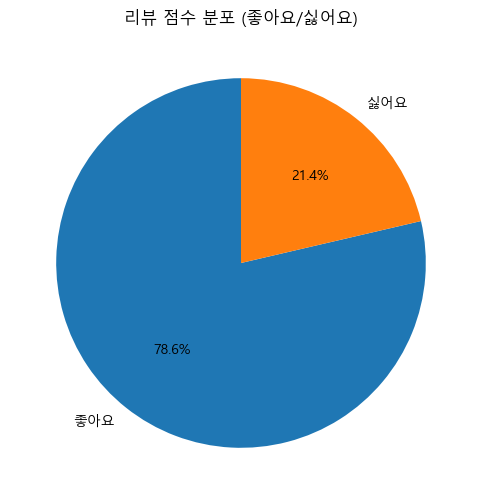

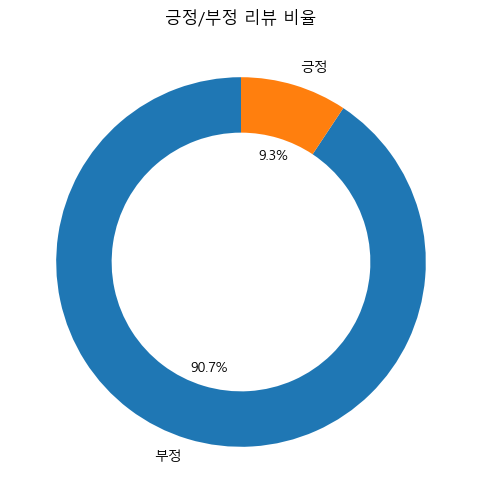

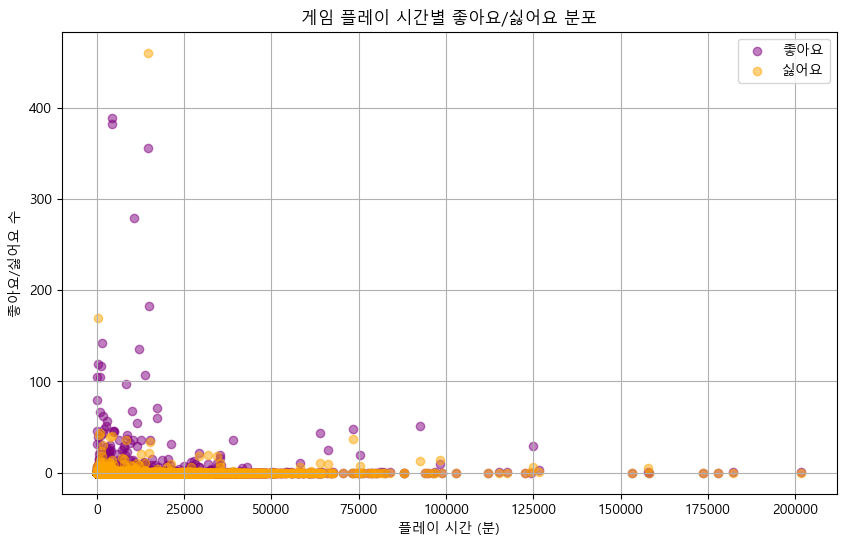

In [8]:
# 실행
visualize_review_score_pie(df_skul)
visualize_sentiment_donut(df_skul)
visualize_playtime_vs_votes(df_skul)